In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
! pip install seaborn
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [4]:
## Exploring dataset (dataset = dictionary)
diabetes.keys()
print (diabetes.DESCR)
diabetes.data.shape

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

(442, 10)

In [5]:
## Converting boston.data in pandas-df
diab = pd.DataFrame(diabetes.data)
diab.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
## Data Processing Part
# Renaming columns (only numbers) in original names
diab.columns = diabetes.feature_names
diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
## Adding the Target column
diab['Target'] = diabetes.target
diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [8]:
## Defining X and Y
diab = diab.loc[:,['bmi', 'Target']]
diab.columns = ['X', 'Y']
diab.head()

,X,Y
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


Text(0.5,10.256,'Explanatory')

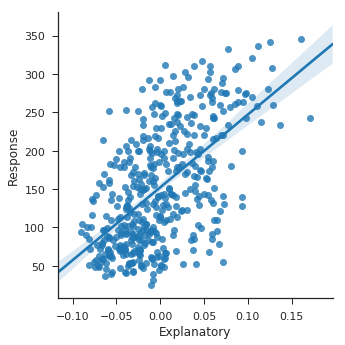

In [9]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('X','Y', data=diab)
plt.ylabel('Response')
plt.xlabel('Explanatory')

### Implementation of Linear Regression

In [12]:
## Splitting into Training and Test Set
trainX = np.asarray(diab.X[20:len(diab.X)]).reshape(-1, 1)
trainY = np.asarray(diab.Y[20:len(diab.Y)]).reshape(-1, 1)
testX = np.asarray(diab.X[:20]).reshape(-1, 1)
testY = np.asarray(diab.Y[:20]).reshape(-1, 1)

# Create linear regression object
linear = linear_model.LinearRegression()

# Train the model using the training sets
linear.fit(trainX, trainY)

# Make predictions using the testing set
predicted = linear.predict(testX)

# Calculating R^2
linear.score(trainX, trainY)

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print('R^2 Value: \n', linear.score(trainX, trainY))
mseFull = np.mean((testY - predicted)**2)
print ('Mean squared error: \n', mseFull)

Coefficient: 
 [[965.62221462]]
Intercept: 
 [152.4293053]
R^2 Value: 
 0.35343216146949086
Mean squared error: 
 3319.2482724649917
